*Parts of this notebook are based on notebooks provided with the book: [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the original content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

In [2]:
import pandas as pd
import numpy as np

# Exercises with pandas Series

## Part 1:  Rainfall in Seattle

Contrary to popular belief, Seattle is not as rainy as you would think.  To see what the data says, we will load a dataset containing data on one year's rainfall.  Like many of the datasets we will look at in this course, the data is in a CSV file.  We have seen how to read CSV files using pure Python.  pandas provides us a more sophisticated method for doing so, using [pd.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).
The relevant information is contained in the fourth column of the dataset.  One of the nice things about `read_csv`, is that the file doesn't have to be stored on your machine, and can be read directly from a CSV file stored somewhere on the internet.

In [25]:
url = 'https://github.com/jakevdp/PythonDataScienceHandbook/raw/master/notebooks_v1/data/Seattle2014.csv'
rainfall = pd.read_csv(url, sep=',', usecols=[3])

In [27]:
# convert the DataFrame into a Series object:
rainfall = pd.Series(rainfall.values.reshape((len(rainfall),)))

In [29]:
rainfall.head()

0     0
1    41
2    15
3     0
4     0
dtype: int64

The Series contains 365 values, giving daily rainfall in mm from January 1 to December 31, 2014.

As a first quick visualization, let's look at the histogram of rainfall using Matplotlib:

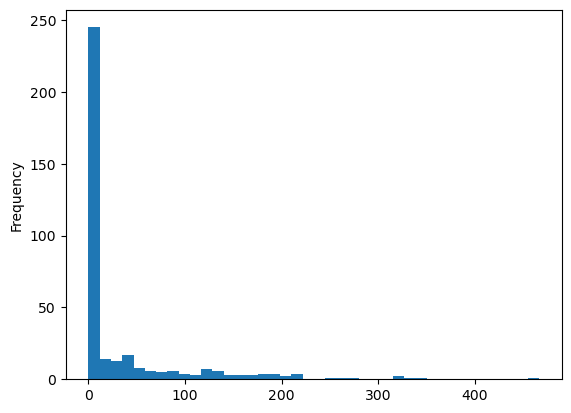

In [32]:
rainfall.plot.hist(bins=40);

This histogram gives us a general idea of what the data looks like: despite its reputation, the vast majority of days in Seattle saw zero or close to zero rainfall in 2014. In the following exercises you will answer more detailed questions about the data.

In the following exercises use array Boolean operations (and refrain from using for loops!) to determine the following:

* To confirm our observation from the histogram, how many days had zero rainfall?

In [37]:
(rainfall == 0).value_counts()[True]

215

This used the `value_counts` method to count the number of occurrences of each value.  Here's an alternative way of doing this:

In [40]:
(rainfall == 0).sum()

215

* How many days had rainfall of between 10mm and 200mm?  (FYI there are 254 mm in an inch). 

In [61]:
((rainfall >= 10) & (rainfall <= 200)).sum()

109

* How many days with rain had strictly less than 10mm of rain?

In [57]:
((rainfall < 10) & (rainfall > 0)).sum()

27

* What was the average precipitation on rainy days?  (Use the `mean` method of a Series to compute the average).

In [94]:
rainfall[rainfall > 0].mean()

82.18666666666667

* What was the average precipitation on summer rainy days (i.e. summer days that had rain)?  We'll count summer as going from June 21st which is the 172nd day of the year until (and including), day 262 of the year.  

In [96]:
summer_rainfall = rainfall[172:263]
summer_rainfall[summer_rainfall > 0].mean()

52.5

## Part 2

For our second set exercises, suppose we have data on individuals.  Each individual has data that corresponds to them:

In [73]:
names = pd.Series(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe', 'Alan', 'Bob'])
rng = np.random.default_rng(42)
# create data associated with each individual
data = pd.Series(rng.standard_normal((9,)))

In [75]:
for i in range(len(names)) :
    print(names[i], data[i])

Bob 0.30471707975443135
Joe -1.0399841062404955
Will 0.7504511958064572
Bob 0.9405647163912139
Will -1.9510351886538364
Joe -1.302179506862318
Joe 0.12784040316728537
Alan -0.3162425923435822
Bob -0.016801157504288795


We will query this data in several ways.  As an example, to extract the data that correspond to Bob, we can use a Boolean mask as follows:

In [78]:
data[names == 'Bob']

0    0.304717
3    0.940565
8   -0.016801
dtype: float64

Using this data do the following:

* Extract all data that does not correspond to Bob.

In [82]:
data[names != 'Bob']

1   -1.039984
2    0.750451
4   -1.951035
5   -1.302180
6    0.127840
7   -0.316243
dtype: float64

* Extract all the data rows that correspond to 'Will' or 'Joe'

In [88]:
data[(names == 'Will') | (names == 'Joe')]

1   -1.039984
2    0.750451
4   -1.951035
5   -1.302180
6    0.127840
dtype: float64

* Replace all negative elements of the array with the value 0.  This can be done with a single command!

In [90]:
data[data < 0] = 0

In [92]:
data

0    0.304717
1    0.000000
2    0.750451
3    0.940565
4    0.000000
5    0.000000
6    0.127840
7    0.000000
8    0.000000
dtype: float64